<a href="https://colab.research.google.com/github/kitiluck/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

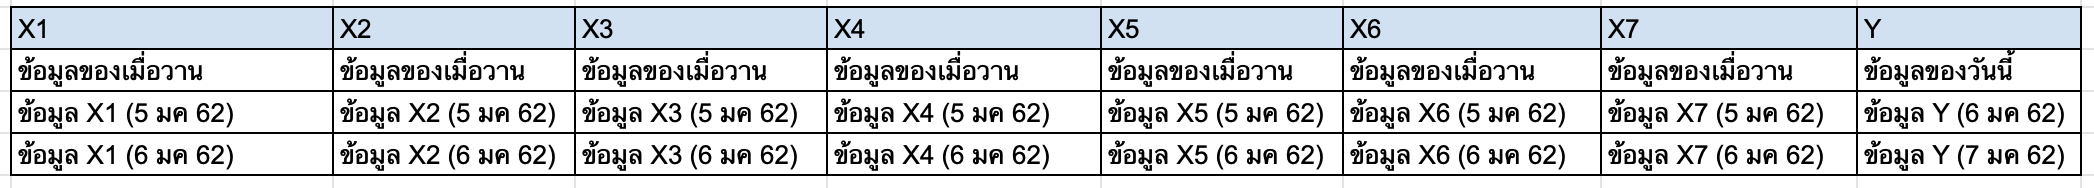

# Lode data

In [1271]:
import pandas as pd
import numpy as np

# Load Excel from Drive

In [1272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1273]:
import os # os การเข้าไปใน path ใน google drive
os.chdir('/content/drive/MyDrive/BSC_DPDM2023')

!pwd #เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/BSC_DPDM2023


## ความกดอากาศ

In [1274]:
Air_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx')
Air_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx')
Air_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx')
Air_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx')
Air_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx')


In [1275]:
Air_K.columns = Air_K.iloc[3]
Air_K = Air_K.iloc[4:].reset_index().iloc[:,1:]
Air_K.head()

3,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [1276]:
Air_NA.columns = Air_NA.iloc[3]
Air_NA = Air_NA.iloc[4:].reset_index().iloc[:,1:]
Air_NA.head()

3,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.51
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608


In [1277]:
Air_S.columns = Air_S.iloc[3]
Air_S = Air_S.iloc[4:].reset_index().iloc[:,1:]
Air_S.head()

3,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554


In [1278]:
Air_NO.columns = Air_NO.iloc[3]
Air_NO = Air_NO.iloc[4:].reset_index().iloc[:,1:]
Air_NO.head()

3,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [1270]:
Air_L.columns = Air_L.iloc[3]
Air_L = Air_L.iloc[4:].reset_index().iloc[:,1:]
Air_L.head()

3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1015.42,1014.07,1012.35,1013.49,1014.99,1015.7,1017.24,...,1010.1,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.3674193548388
0,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667
1,3,352201-หนองคาย จ.หนองคาย,2012-10-01 00:00:00,1011.41,1010.77,1008.72,1007.10,1008.28,1010.43,1010.47,...,1011.23,1010.45,1009.91,1009.48,1008.96,1008.94,1008.57,1008.67,1011.74,1010.511613
2,4,352201-หนองคาย จ.หนองคาย,2012-11-01 00:00:00,1012.46,1011.06,1010.41,1010.43,1010.33,1010.79,1009.67,...,1008.87,1010.62,1011.06,1010.99,1010.52,1010.43,1010.11,1009.83,-,1010.542667
3,5,352201-หนองคาย จ.หนองคาย,2012-12-01 00:00:00,1009.81,1010.25,1011.09,1010.69,1010.66,1011.99,1011.76,...,1014.52,1016.15,1013.87,1012.48,1011.23,1010.29,1010.23,1011.63,1014.75,1011.970645
4,6,352201-หนองคาย จ.หนองคาย,2013-01-01 00:00:00,1014.63,1013.32,1013.99,1012.97,1011.70,1012.76,1012.56,...,1013.02,1012.71,1012.15,1011.74,1014.16,1015.69,1014.81,1014.81,1016.39,1013.735484


เปลี่ยนชื่อ column

In [1279]:
Air_K.columns=['ที่','สถานที่','เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย']

In [1280]:
Air_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [1281]:
C = ['ที่','สถานที่','เดือน/ปี','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','เฉลี่ย']

In [1282]:
Air_NA.columns=[C]
Air_S.columns=[C]
Air_NO.columns=[C]
Air_L.columns=[C]

In [1283]:
Air_NA.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1006.3,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.51
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608


In [1284]:
Air_S.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.47
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1014.05,1013.71,1014.95,1013.68,1011.72,1008.93,1008.08,...,1005.73,1005.04,1004.96,1005.94,1008.70,1007.38,1007.25,1011.06,-,1010.554


In [1285]:
Air_NO.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,...,1011.01,1010.71,1011.67,1012.36,1012.50,1012.81,1011.88,1011.77,1012.18,1010.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01 00:00:00,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,...,1015.27,1016.46,1014.65,1013.08,1011.62,1010.21,1010.71,1011.1,-,1012.332333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01 00:00:00,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,...,1013.94,1016.92,1019.05,1019.88,1017.86,1016.76,1015.63,1016.31,1017.19,1015.468065
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01 00:00:00,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,...,1011.56,1011.98,1012.20,1012.95,1011.23,1010.63,1010.96,1013.16,1015.38,1013.062903
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01 00:00:00,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,...,1005.89,1005.54,1005.28,1005.32,1007.59,1006.66,1007.07,1011.1,-,1010.214667


In [1286]:
Air_L.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.0,28.00,29,30,31,NaN
4,1,352201-หนองคาย จ.หนองคาย,2011-10-01 00:00:00,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.0,1012.74,1011.69,1011.27,1011.71,1010.343871


## ความชื้นสัมพัทธ์

In [1287]:
Rhum_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx')
Rhum_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx')
Rhum_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx')
Rhum_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx')
Rhum_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx')


In [1288]:
Rhum_K.columns = Rhum_K.iloc[3]
Rhum_K = Rhum_K.iloc[4:].reset_index().iloc[:,1:]


Rhum_NA.columns = Rhum_NA.iloc[3]
Rhum_NA = Rhum_NA.iloc[4:].reset_index().iloc[:,1:]


Rhum_S.columns = Rhum_S.iloc[3]
Rhum_S = Rhum_S.iloc[4:].reset_index().iloc[:,1:]


Rhum_NO.columns = Rhum_NO.iloc[3]
Rhum_NO = Rhum_NO.iloc[4:].reset_index().iloc[:,1:]


Rhum_L.columns = Rhum_L.iloc[3]
Rhum_L = Rhum_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column


In [1289]:
Rhum_K.columns=[C]
Rhum_NA.columns=[C]
Rhum_S.columns=[C]
Rhum_NO.columns=[C]
Rhum_L.columns=[C]


In [1290]:
Rhum_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,83,92.0,86.0,80.0,86.0,86.0,83.0,...,73.0,72.0,73.0,69.0,69.0,75.0,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01 00:00:00,71,65.0,68.0,65.0,65.0,68.0,69.0,...,65.0,66.0,65.0,67.0,68.0,67.0,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01 00:00:00,66,61.0,61.0,62.0,61.0,60.0,69.0,...,63.0,62.0,60.0,60.0,62.0,65.0,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01 00:00:00,65,66.0,69.0,63.0,64.0,68.0,65.0,...,80.0,74.0,75.0,71.0,75.0,69.0,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01 00:00:00,71,72.0,71.0,72.0,70.0,68.0,61.0,...,58.0,53.0,48.0,57.0,71.0,73.0,68,-,-,65


In [1291]:
Rhum_L.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,90,95.0,92.0,89.0,86.0,94.0,90.0,...,85.0,86.0,83.0,84.0,85.0,85.0,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01 00:00:00,85,83.0,84.0,83.0,83.0,85.0,83.0,...,73.0,77.0,80.0,81.0,80.0,84.0,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01 00:00:00,80,77.0,77.0,76.0,78.0,83.0,82.0,...,80.0,74.0,75.0,74.0,80.0,80.0,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01 00:00:00,75,78.0,81.0,79.0,73.0,77.0,82.0,...,83.0,80.0,83.0,79.0,80.0,78.0,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01 00:00:00,79,81.0,91.0,84.0,78.0,73.0,69.0,...,67.0,68.0,68.0,67.0,76.0,73.0,70,-,-,73


## ความเร็วลม

In [1292]:
Wind_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx')
Wind_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx')
Wind_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx')
Wind_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx')
Wind_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx')

In [1293]:
Wind_K.columns = Wind_K.iloc[3]
Wind_K = Wind_K.iloc[4:].reset_index().iloc[:,1:]


Wind_NA.columns = Wind_NA.iloc[3]
Wind_NA = Wind_NA.iloc[4:].reset_index().iloc[:,1:]


Wind_S.columns = Wind_S.iloc[3]
Wind_S = Wind_S.iloc[4:].reset_index().iloc[:,1:]


Wind_NO.columns = Wind_NO.iloc[3]
Wind_NO = Wind_NO.iloc[4:].reset_index().iloc[:,1:]


Wind_L.columns = Wind_L.iloc[3]
Wind_L = Wind_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column

In [1294]:
Wind_K.columns=[C]
Wind_NA.columns=[C]
Wind_S.columns=[C]
Wind_NO.columns=[C]
Wind_L.columns=[C]

In [1295]:
Wind_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,3,2.0,3,2.0,2.0,3.0,4.0,...,2.0,3.0,5.0,5.0,5.0,4.0,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01 00:00:00,4,5.0,3,3.0,5.0,2.0,3.0,...,7.0,6.0,5.0,5.0,3.0,1.0,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01 00:00:00,3,4.0,4,4.0,4.0,4.0,4.0,...,5.0,6.0,7.0,6.0,5.0,4.0,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01 00:00:00,4,2.0,1,4.0,4.0,2.0,4.0,...,3.0,3.0,4.0,2.0,2.0,1.0,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01 00:00:00,2,2.0,3,2.0,3.0,1.0,2.0,...,1.0,2.0,3.0,2.0,4.0,3.0,3,3,-,2.566667


In [1296]:
Wind_L.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,2,2.0,3.0,2.0,3,2.0,1.0,...,1.0,1,2.0,2.0,1.0,2.0,2,2,1,1.612903
1,2,353301-เลย สกษ. จ.เลย,2011-11-01 00:00:00,1,2.0,1.0,1.0,2,2.0,2.0,...,3.0,2,1.0,1.0,2.0,1.0,2,1,-,1.7
2,3,353301-เลย สกษ. จ.เลย,2011-12-01 00:00:00,2,2.0,3.0,2.0,1,2.0,1.0,...,1.0,2,3.0,2.0,1.0,2.0,1,2,2,1.870968
3,1,353301-เลย สกษ. จ.เลย,2012-01-01 00:00:00,2,2.0,1.0,2.0,2,2.0,2.0,...,2.0,1,3.0,2.0,2.0,2.0,2,1,1,1.83871
4,2,353301-เลย สกษ. จ.เลย,2012-02-01 00:00:00,1,2.0,2.0,1.0,1,2.0,1.0,...,1.0,1,1.0,1.0,3.0,4.0,2,1,-,1.7


## จำนวนเมฆ

In [1297]:
Cloud_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx')
Cloud_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx')
Cloud_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx')
Cloud_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx')
Cloud_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx')

In [1298]:
Cloud_L.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10,10,9,8,10,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ตัดจำนวน column ที่เกิน

In [1299]:
columns_to_drop = [35,36,37,38,39,40,41,42,43,44]
Cloud_L.drop(Cloud_L.columns[columns_to_drop],axis=1, inplace = True)
Cloud_L.head()

,จำนวนเมฆ(10ส่วน),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,รายวัน,NaN,NaN,จ.เลย,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ที่,สถานี,เดือน/ปี,วันที่,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,เฉลี่ย
3,NaN,NaN,NaN,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,NaN
4,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097


In [1300]:
Cloud_K.columns = Cloud_K.iloc[3]
Cloud_K = Cloud_K.iloc[4:].reset_index().iloc[:,1:]


Cloud_NA.columns = Cloud_NA.iloc[3]
Cloud_NA = Cloud_NA.iloc[4:].reset_index().iloc[:,1:]


Cloud_S.columns = Cloud_S.iloc[3]
Cloud_S = Cloud_S.iloc[4:].reset_index().iloc[:,1:]


Cloud_NO.columns = Cloud_NO.iloc[3]
Cloud_NO = Cloud_NO.iloc[4:].reset_index().iloc[:,1:]


Cloud_L.columns = Cloud_L.iloc[3]
Cloud_L = Cloud_L.iloc[4:].reset_index().iloc[:,1:]

In [1301]:
Cloud_L.head()

3,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,NaN
0,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01 00:00:00,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01 00:00:00,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01 00:00:00,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01 00:00:00,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


เปลี่ยนชื่อ column

In [1302]:
Cloud_K.columns=[C]
Cloud_NA.columns=[C]
Cloud_S.columns=[C]
Cloud_NO.columns=[C]
Cloud_L.columns=[C]

In [1303]:
Cloud_L.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01 00:00:00,8,10,10,9,8,10,10,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,353301-เลย สกษ. จ.เลย,2011-11-01 00:00:00,2,1,2,1,1,1,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,353301-เลย สกษ. จ.เลย,2011-12-01 00:00:00,1,3,1,3,3,2,3,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,353301-เลย สกษ. จ.เลย,2012-01-01 00:00:00,1,1,3,6,6,2,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,353301-เลย สกษ. จ.เลย,2012-02-01 00:00:00,8,5,10,7,1,0,-,...,-,-,-,0,1,3,-,3,-,2.809524


## ปริมาณฝน

In [1304]:
Rainfall_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx')
Rainfall_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx')
Rainfall_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx')
Rainfall_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx')
Rainfall_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx')

In [1305]:
Rainfall_K.columns = Rainfall_K.iloc[3]
Rainfall_K = Rainfall_K.iloc[4:].reset_index().iloc[:,1:]


Rainfall_NA.columns = Rainfall_NA.iloc[3]
Rainfall_NA = Rainfall_NA.iloc[4:].reset_index().iloc[:,1:]


Rainfall_S.columns = Rainfall_S.iloc[3]
Rainfall_S = Rainfall_S.iloc[4:].reset_index().iloc[:,1:]


Rainfall_NO.columns = Rainfall_NO.iloc[3]
Rainfall_NO = Rainfall_NO.iloc[4:].reset_index().iloc[:,1:]


Rainfall_L.columns = Rainfall_L.iloc[3]
Rainfall_L = Rainfall_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column

In [1306]:
Rainfall_K.columns=[C]
Rainfall_NA.columns=[C]
Rainfall_S.columns=[C]
Rainfall_NO.columns=[C]
Rainfall_L.columns=[C]

In [1307]:
Rainfall_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01 00:00:00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01 00:00:00,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T


##  อุณหภูมิจุดน้ำค้าง

In [1308]:
Dew_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx')
Dew_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx')
Dew_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx')
Dew_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx')
Dew_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx')

In [1309]:
Dew_K.columns = Dew_K.iloc[3]
Dew_K = Dew_K.iloc[4:].reset_index().iloc[:,1:]


Dew_NA.columns = Dew_NA.iloc[3]
Dew_NA = Dew_NA.iloc[4:].reset_index().iloc[:,1:]


Dew_S.columns = Dew_S.iloc[3]
Dew_S = Dew_S.iloc[4:].reset_index().iloc[:,1:]


Dew_NO.columns = Dew_NO.iloc[3]
Dew_NO = Dew_NO.iloc[4:].reset_index().iloc[:,1:]


Dew_L.columns = Dew_L.iloc[3]
Dew_L = Dew_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column

In [1310]:
Dew_K.columns=[C]
Dew_NA.columns=[C]
Dew_S.columns=[C]
Dew_NO.columns=[C]
Dew_L.columns=[C]

In [1311]:
Dew_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,24.2,24.0,22.9,21.9,21.7,21.3,21.9,...,21.0,21.8,21.8,20.7,20.8,21.9,20.3,19.7,19.7,21.903226
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01 00:00:00,20.2,18.5,19.4,19.0,19.2,20.6,21.3,...,18.9,16.7,16.7,18.3,19.2,18.9,19,18.3,-,18.91
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01 00:00:00,17.7,15.3,12.7,14.0,14.6,16.6,19.1,...,15.8,12.9,9.8,9.7,12.4,16.1,16.3,16.1,16.3,14.525806
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01 00:00:00,16.5,17.4,18.7,17.0,15.3,16.7,15.6,...,21.5,19.2,19.2,16.3,19.5,19.7,19.4,18.7,16.7,18.058065
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01 00:00:00,18,19.6,19.5,19.2,20.7,20.8,19.1,...,18.4,17.0,16.3,18.8,22.3,22.1,21.3,-,-,18.772414


## อุณหภูมิต่ำสุด

In [1312]:
Lower_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx')
Lower_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx')
Lower_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx')
Lower_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx')
Lower_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx')

In [1313]:
Lower_K.columns = Lower_K.iloc[3]
Lower_K = Lower_K.iloc[4:].reset_index().iloc[:,1:]


Lower_NA.columns = Lower_NA.iloc[3]
Lower_NA = Lower_NA.iloc[4:].reset_index().iloc[:,1:]


Lower_S.columns = Lower_S.iloc[3]
Lower_S = Lower_S.iloc[4:].reset_index().iloc[:,1:]


Lower_NO.columns = Lower_NO.iloc[3]
Lower_NO = Lower_NO.iloc[4:].reset_index().iloc[:,1:]


Lower_L.columns = Lower_L.iloc[3]
Lower_L = Lower_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column

In [1314]:
Lower_K.columns=[C]
Lower_NA.columns=[C]
Lower_S.columns=[C]
Lower_NO.columns=[C]
Lower_L.columns=[C]

In [1315]:
Lower_K

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,24.8,23.0,22.1,22.8,23.1,21.7,22.0,...,21.3,22,22.7,21.6,21.7,22.4,21.7,20.2,21.1,22.4
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01 00:00:00,20.7,20.4,20.5,20.9,20.6,22.2,23.8,...,21.5,18.5,18.4,18.9,20.2,20.1,20.2,19.8,-,20.3
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01 00:00:00,19.3,18.9,15.4,15.6,16.3,20.2,20.8,...,17.1,16.5,12.1,11.6,13.2,16.5,16.7,18.4,17,16.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01 00:00:00,17.7,19.6,20.4,20.7,16.8,16.9,16.8,...,22.6,18.6,19.4,16.2,17.5,21.6,20.8,21.6,20.1,19.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01 00:00:00,19.4,20.5,20.9,20.9,21.5,21.1,20.7,...,19.6,21.3,21.1,21.3,23.4,22,22.2,-,-,20.1
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01 00:00:00,22.5,22.5,23.5,24.2,24.0,23.2,21.9,...,22.5,23.1,23.2,23.3,22.6,23.7,24.3,24.3,22.7,23
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01 00:00:00,20.4,21.0,21.2,22.0,23.3,24.1,23.5,...,24.4,24.9,23.2,23.4,24.3,23,23.8,23.8,-,23.3
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01 00:00:00,23.2,23.1,24.0,23.7,24.1,20.5,20.9,...,20.5,16.1,16.8,20.3,21.2,20.5,20.8,21.3,15.9,21
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01 00:00:00,14.7,17.8,18.1,17.7,17.7,18.2,17.5,...,20.4,20.5,21.7,22.0,22.7,19.3,18.1,20.5,21.7,18.8
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01 00:00:00,19.7,21.4,20.9,22.2,22.0,22.2,22.7,...,19.6,19,21.4,23.4,24.4,24.6,-,-,-,21.9


## อุณหภูมิตุ้มแห้ง


In [1316]:
Dry_K = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx')
Dry_NA = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx')
Dry_S = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx')
Dry_NO = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx')
Dry_L = pd.read_excel('/content/drive/MyDrive/BSC_DPDM2023/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx')

In [1317]:
Dry_K.columns = Dry_K.iloc[3]
Dry_K = Dry_K.iloc[4:].reset_index().iloc[:,1:]


Dry_NA.columns = Dry_NA.iloc[3]
Dry_NA = Dry_NA.iloc[4:].reset_index().iloc[:,1:]


Dry_S.columns = Dry_S.iloc[3]
Dry_S = Dry_S.iloc[4:].reset_index().iloc[:,1:]


Dry_NO.columns = Dry_NO.iloc[3]
Dry_NO = Dry_NO.iloc[4:].reset_index().iloc[:,1:]


Dry_L.columns = Dry_L.iloc[3]
Dry_L = Dry_L.iloc[4:].reset_index().iloc[:,1:]

เปลี่ยนชื่อ column

In [1318]:
Dry_K.columns=[C]
Dry_NA.columns=[C]
Dry_S.columns=[C]
Dry_NO.columns=[C]
Dry_L.columns=[C]

In [1319]:
Dry_K.head()

,ที่,สถานที่,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,เฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01 00:00:00,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01 00:00:00,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01 00:00:00,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01 00:00:00,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01 00:00:00,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5


## ตรวจสอบขนาดข้อมูล

In [1320]:
Dew_L.shape

(50, 35)

In [1321]:
Dry_L.shape

(50, 35)

In [1322]:
Air_L.shape

(59, 35)

จำนวนขนาดข้อมูลของ อุณหภูมิจุดน้ำค้าง และ อุณหภูมิตุ้มเเห้ง มีจำนวน ไม่เท่ากับ ข้อมูลอื่น

# เช็คค่า missing data และ แก้ค่า missing ด้วยค่าเฉลี่ย

#### เปลี่ยนค่า - ด้วย replace

In [1323]:
## ความกดอากาศ
Air_KK = Air_K.replace('-',np.NaN) # เปลี่ยน - เป็น NaN
Air_KK.isnull().any() # เช็คค่า Missing


ที่         False
สถานที่     False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [1324]:
Air_NA1 = Air_NA.replace('-',np.NaN)
Air_S1 = Air_S.replace('-',np.NaN)
Air_NO1 = Air_NO.replace('-',np.NaN)
Air_L1 = Air_L.replace('-',np.NaN)

In [1325]:
## ความชื้นสัมพัทธ์
Rhum_K1 = Rhum_K.replace('-',np.NaN)
Rhum_NA1 = Rhum_NA.replace('-',np.NaN)
Rhum_S1 = Rhum_S .replace('-',np.NaN)
Rhum_NO1 = Rhum_NO.replace('-',np.NaN)
Rhum_L1 = Rhum_L.replace('-',np.NaN)

In [1326]:
## ความเร็วลม
Wind_K1 = Wind_K.replace('-',np.NaN)
Wind_NA1 = Wind_NA.replace('-',np.NaN)
Wind_S1 = Wind_S .replace('-',np.NaN)
Wind_NO1 = Wind_NO.replace('-',np.NaN)
Wind_L1 = Wind_L.replace('-',np.NaN)

In [1327]:
## จำนวนเมฆ
Cloud_K1 = Cloud_K.replace('-',np.NaN)
Cloud_NA1 = Cloud_NA.replace('-',np.NaN)
Cloud_S1 = Cloud_S .replace('-',np.NaN)
Cloud_NO1 = Cloud_NO.replace('-',np.NaN)
Cloud_L1 = Cloud_L.replace('-',np.NaN)

In [1328]:
## ปริมาณฝน
Rainfall_K1 = Rainfall_K.replace('-',np.NaN)
Rainfall_NA1 = Rainfall_NA.replace('-',np.NaN)
Rainfall_S1 = Rainfall_S .replace('-',np.NaN)
Rainfall_NO1 = Rainfall_NO.replace('-',np.NaN)
Rainfall_L1 = Rainfall_L.replace('-',np.NaN)

## ปริมาณฝน แทนค่า T
Rainfall_K2 = Rainfall_K1.replace('T',0.09)
Rainfall_NA2 = Rainfall_NA1.replace('T',0.09)
Rainfall_S2 = Rainfall_S1 .replace('T',0.09)
Rainfall_NO2 = Rainfall_NO1.replace('T',0.09)
Rainfall_L2 = Rainfall_L1.replace('T',0.09)

In [1329]:
## อุณหภูมิจุดน้ำค้าง
Dew_K1 = Dew_K.replace('-',np.NaN)
Dew_NA1 = Dew_NA.replace('-',np.NaN)
Dew_S1 = Dew_S .replace('-',np.NaN)
Dew_NO1 = Dew_NO.replace('-',np.NaN)
Dew_L1 = Dew_L.replace('-',np.NaN)

In [1330]:
## อุณหภูมิต่ำสุด
Lower_K1 = Lower_K.replace('-',np.NaN)
Lower_NA1 = Lower_NA.replace('-',np.NaN)
Lower_S1 = Lower_S .replace('-',np.NaN)
Lower_NO1 = Lower_NO.replace('-',np.NaN)
Lower_L1 = Lower_L.replace('-',np.NaN)

In [1331]:
## อุณหภูมิตุ้มแห้ง
Dry_K1 = Dry_K.replace('-',np.NaN)
Dry_NA1 = Dry_NA.replace('-',np.NaN)
Dry_S1 = Dry_S .replace('-',np.NaN)
Dry_NO1 = Dry_NO.replace('-',np.NaN)
Dry_L1 = Dry_L.replace('-',np.NaN)

# หาค่าเฉลี่ยของอุตุใหม่

In [1332]:
# หาค่าเฉลี่ยของแต่ละแถว
Air_KK['เฉลี่ย']= Air_KK.mean(axis=1)
Air_NA1['เฉลี่ย']= Air_NA1.mean(axis=1)
Air_S1['เฉลี่ย']= Air_S1.mean(axis=1)
Air_NO1['เฉลี่ย']= Air_NO1.mean(axis=1)
Air_L1['เฉลี่ย']= Air_L1.mean(axis=1)

<ipython-input-1332-c090dd536431>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Air_KK['เฉลี่ย']= Air_KK.mean(axis=1)
<ipython-input-1332-c090dd536431>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Air_KK['เฉลี่ย']= Air_KK.mean(axis=1)
<ipython-input-1332-c090dd536431>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Air_NA1['เฉลี่ย']= Air_NA1.mean(axis=1)
<ipython-input-1332-c090dd536431>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Air_NA1['เฉล

In [1333]:
Rhum_K1['เฉลี่ย']= Rhum_K1.mean(axis=1)
Rhum_NA1['เฉลี่ย']= Rhum_NA1.mean(axis=1)
Rhum_S1['เฉลี่ย']= Rhum_S1.mean(axis=1)
Rhum_NO1['เฉลี่ย']= Rhum_NO1.mean(axis=1)
Rhum_L1['เฉลี่ย']= Rhum_L1.mean(axis=1)

<ipython-input-1333-3de32db9ac25>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rhum_K1['เฉลี่ย']= Rhum_K1.mean(axis=1)
<ipython-input-1333-3de32db9ac25>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rhum_K1['เฉลี่ย']= Rhum_K1.mean(axis=1)
<ipython-input-1333-3de32db9ac25>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rhum_NA1['เฉลี่ย']= Rhum_NA1.mean(axis=1)
<ipython-input-1333-3de32db9ac25>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rhum_N

In [1334]:
Wind_K1['เฉลี่ย']= Wind_K1.mean(axis=1)
Wind_NA1['เฉลี่ย']= Wind_NA1.mean(axis=1)
Wind_S1['เฉลี่ย']= Wind_S1.mean(axis=1)
Wind_NO1['เฉลี่ย']= Wind_NO1.mean(axis=1)
Wind_L1['เฉลี่ย']= Wind_L1.mean(axis=1)

<ipython-input-1334-f79738cbeb38>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Wind_K1['เฉลี่ย']= Wind_K1.mean(axis=1)
<ipython-input-1334-f79738cbeb38>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Wind_K1['เฉลี่ย']= Wind_K1.mean(axis=1)
<ipython-input-1334-f79738cbeb38>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Wind_NA1['เฉลี่ย']= Wind_NA1.mean(axis=1)
<ipython-input-1334-f79738cbeb38>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Wind_N

In [1335]:
Cloud_K1['เฉลี่ย']= Cloud_K1.mean(axis=1)
Cloud_NA1['เฉลี่ย']= Cloud_NA1.mean(axis=1)
Cloud_S1['เฉลี่ย']= Cloud_S1.mean(axis=1)
Cloud_NO1['เฉลี่ย']= Cloud_NO1.mean(axis=1)
Cloud_L1['เฉลี่ย']= Cloud_L1.mean(axis=1)

<ipython-input-1335-26fbc0fdc90d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Cloud_K1['เฉลี่ย']= Cloud_K1.mean(axis=1)
<ipython-input-1335-26fbc0fdc90d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cloud_K1['เฉลี่ย']= Cloud_K1.mean(axis=1)
<ipython-input-1335-26fbc0fdc90d>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Cloud_NA1['เฉลี่ย']= Cloud_NA1.mean(axis=1)
<ipython-input-1335-26fbc0fdc90d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  

In [1336]:
Rainfall_K2['เฉลี่ย']= Rainfall_K2.mean(axis=1)
Rainfall_NA2['เฉลี่ย']=Rainfall_NA2.mean(axis=1)
Rainfall_S2['เฉลี่ย']=Rainfall_S2.mean(axis=1)
Rainfall_NO2['เฉลี่ย']= Rainfall_NO2.mean(axis=1)
Rainfall_L2['เฉลี่ย']= Rainfall_L2.mean(axis=1)

<ipython-input-1336-f6533ffcd5e5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rainfall_K2['เฉลี่ย']= Rainfall_K2.mean(axis=1)
<ipython-input-1336-f6533ffcd5e5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Rainfall_K2['เฉลี่ย']= Rainfall_K2.mean(axis=1)
<ipython-input-1336-f6533ffcd5e5>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Rainfall_NA2['เฉลี่ย']=Rainfall_NA2.mean(axis=1)
<ipython-input-1336-f6533ffcd5e5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling 

In [1337]:
Dew_K1['เฉลี่ย']= Dew_K1.mean(axis=1)
Dew_NA1['เฉลี่ย']=Dew_NA1.mean(axis=1)
Dew_S1['เฉลี่ย']=Dew_S1.mean(axis=1)
Dew_NO1['เฉลี่ย']= Dew_NO1.mean(axis=1)
Dew_L1['เฉลี่ย']= Dew_L1.mean(axis=1)

<ipython-input-1337-a2ff15d409fc>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Dew_K1['เฉลี่ย']= Dew_K1.mean(axis=1)
<ipython-input-1337-a2ff15d409fc>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dew_K1['เฉลี่ย']= Dew_K1.mean(axis=1)
<ipython-input-1337-a2ff15d409fc>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Dew_NA1['เฉลี่ย']=Dew_NA1.mean(axis=1)
<ipython-input-1337-a2ff15d409fc>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dew_NA1['เฉลี

In [1338]:
Lower_K1['เฉลี่ย']= Lower_K1.mean(axis=1)
Lower_NA1['เฉลี่ย']=Lower_NA1.mean(axis=1)
Lower_S1['เฉลี่ย']=Lower_S1.mean(axis=1)
Lower_NO1['เฉลี่ย']=Lower_NO1.mean(axis=1)
Lower_L1['เฉลี่ย']= Lower_L1.mean(axis=1)

<ipython-input-1338-5557f1e8de53>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Lower_K1['เฉลี่ย']= Lower_K1.mean(axis=1)
<ipython-input-1338-5557f1e8de53>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Lower_K1['เฉลี่ย']= Lower_K1.mean(axis=1)
<ipython-input-1338-5557f1e8de53>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Lower_NA1['เฉลี่ย']=Lower_NA1.mean(axis=1)
<ipython-input-1338-5557f1e8de53>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  L

In [1339]:
Dry_K1['เฉลี่ย']= Dry_K1.mean(axis=1)
Dry_NA1['เฉลี่ย']=Dry_NA1.mean(axis=1)
Dry_S1['เฉลี่ย']=Dry_S1.mean(axis=1)
Dry_NO1['เฉลี่ย']=Dry_NO1.mean(axis=1)
Dry_L1['เฉลี่ย']= Dry_L1.mean(axis=1)

<ipython-input-1339-89c3bf4cd67a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Dry_K1['เฉลี่ย']= Dry_K1.mean(axis=1)
<ipython-input-1339-89c3bf4cd67a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dry_K1['เฉลี่ย']= Dry_K1.mean(axis=1)
<ipython-input-1339-89c3bf4cd67a>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Dry_NA1['เฉลี่ย']=Dry_NA1.mean(axis=1)
<ipython-input-1339-89c3bf4cd67a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Dry_NA1['เฉลี

## แก้ค่า Missing data เป็นค่าเฉลี่ย ด้วยการแทนค่า เฉลี่ยใน NaN

In [1340]:
## ความกดอากาศ
for i in range(len(Air_KK['ที่'])):
  Air_KK.iloc[i,:] = Air_KK.iloc[i,:].fillna(Air_KK.iloc[i]['เฉลี่ย'])

In [1341]:
Dry_NA1.isnull().any() # เช็คค่า Missing

ที่         False
สถานที่     False
เดือน/ปี    False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29           True
30           True
31           True
เฉลี่ย      False
dtype: bool

In [1342]:
for i in range(len(Air_NA1['ที่'])):
  Air_NA1.iloc[i,:] = Air_NA1.iloc[i,:].fillna(Air_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_S1['ที่'])):
  Air_S1.iloc[i,:] = Air_S1.iloc[i,:].fillna(Air_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_NO1['ที่'])):
  Air_NO1.iloc[i,:] = Air_NO1.iloc[i,:].fillna(Air_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Air_L1['ที่'])):
  Air_L1.iloc[i,:] = Air_L1.iloc[i,:].fillna(Air_L1.iloc[i]['เฉลี่ย'])

In [1343]:
## ความชื้นสัมพัทธ์
for i in range(len(Rhum_K1['ที่'])):
  Rhum_K1.iloc[i,:] = Rhum_K1.iloc[i,:].fillna(Rhum_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_NA1['ที่'])):
  Rhum_NA1.iloc[i,:] = Rhum_NA1.iloc[i,:].fillna(Rhum_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_S1['ที่'])):
  Rhum_S1.iloc[i,:] = Rhum_S1.iloc[i,:].fillna(Rhum_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_NO1['ที่'])):
  Rhum_NO1.iloc[i,:] = Rhum_NO1.iloc[i,:].fillna(Rhum_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Rhum_L1['ที่'])):
  Rhum_L1.iloc[i,:] = Rhum_L1.iloc[i,:].fillna(Rhum_L1.iloc[i]['เฉลี่ย'])

In [1344]:
## ความเร็วลม
for i in range(len(Wind_K1['ที่'])):
  Wind_K1.iloc[i,:] = Wind_K1.iloc[i,:].fillna(Wind_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_NA1['ที่'])):
  Wind_NA1.iloc[i,:] = Wind_NA1.iloc[i,:].fillna(Wind_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_S1['ที่'])):
  Wind_S1.iloc[i,:] = Wind_S1.iloc[i,:].fillna(Wind_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_NO1['ที่'])):
  Wind_NO1.iloc[i,:] = Wind_NO1.iloc[i,:].fillna(Wind_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Wind_L1['ที่'])):
  Wind_L1.iloc[i,:] = Wind_L1.iloc[i,:].fillna(Wind_L1.iloc[i]['เฉลี่ย'])

In [1345]:
## จำนวนเมฆ
for i in range(len(Cloud_K1['ที่'])):
  Cloud_K1.iloc[i,:] = Cloud_K1.iloc[i,:].fillna(Cloud_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_NA1['ที่'])):
  Cloud_NA1.iloc[i,:] = Cloud_NA1.iloc[i,:].fillna(Cloud_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_S1['ที่'])):
  Cloud_S1.iloc[i,:] = Cloud_S1.iloc[i,:].fillna(Cloud_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_NO1['ที่'])):
  Cloud_NO1.iloc[i,:] = Cloud_NO1.iloc[i,:].fillna(Cloud_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Cloud_L1['ที่'])):
  Cloud_L1.iloc[i,:] = Cloud_L1.iloc[i,:].fillna(Cloud_L1.iloc[i]['เฉลี่ย'])

In [1346]:
## ปริมาณฝน
for i in range(len(Rainfall_K2['ที่'])):
  Rainfall_K2.iloc[i,:] = Rainfall_K2.iloc[i,:].fillna(Rainfall_K2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_NA2['ที่'])):
  Rainfall_NA2.iloc[i,:] = Rainfall_NA2.iloc[i,:].fillna(Rainfall_NA2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_S2['ที่'])):
  Rainfall_S2.iloc[i,:] = Rainfall_S2.iloc[i,:].fillna(Rainfall_S2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_NO2['ที่'])):
  Rainfall_NO2.iloc[i,:] = Rainfall_NO2.iloc[i,:].fillna(Rainfall_NO2.iloc[i]['เฉลี่ย'])

for i in range(len(Rainfall_L2['ที่'])):
  Rainfall_L2.iloc[i,:] = Rainfall_L2.iloc[i,:].fillna(Rainfall_L2.iloc[i]['เฉลี่ย'])

In [1347]:
## อุณหภูมิจุดน้ำค้าง
for i in range(len(Dew_K1['ที่'])):
  Dew_K1.iloc[i,:] = Dew_K1.iloc[i,:].fillna(Dew_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_NA1['ที่'])):
  Dew_NA1.iloc[i,:] = Dew_NA1.iloc[i,:].fillna(Dew_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_S1['ที่'])):
  Dew_S1.iloc[i,:] = Dew_S1.iloc[i,:].fillna(Dew_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_NO1['ที่'])):
  Dew_NO1.iloc[i,:] = Dew_NO1.iloc[i,:].fillna(Dew_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Dew_L1['ที่'])):
  Dew_L1.iloc[i,:] = Dew_L1.iloc[i,:].fillna(Dew_L1.iloc[i]['เฉลี่ย'])

In [1348]:
## อุณหภูมิต่ำสุด
for i in range(len(Lower_K1['ที่'])):
  Lower_K1.iloc[i,:] = Lower_K1.iloc[i,:].fillna(Lower_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_NA1['ที่'])):
  Lower_NA1.iloc[i,:] = Lower_NA1.iloc[i,:].fillna(Lower_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_S1['ที่'])):
  Lower_S1.iloc[i,:] = Lower_S1.iloc[i,:].fillna(Lower_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_NO1['ที่'])):
  Lower_NO1.iloc[i,:] = Lower_NO1.iloc[i,:].fillna(Lower_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Lower_L1['ที่'])):
  Lower_L1.iloc[i,:] = Lower_L1.iloc[i,:].fillna(Lower_L1.iloc[i]['เฉลี่ย'])

In [1349]:
## อุณหภูมิตุ้มแห้ง
for i in range(len(Dry_K1['ที่'])):
  Dry_K1.iloc[i,:] = Dry_K1.iloc[i,:].fillna(Dry_K1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_NA1['ที่'])):
  Dry_NA1.iloc[i,:] = Dry_NA1.iloc[i,:].fillna(Dry_NA1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_S1['ที่'])):
  Dry_S1.iloc[i,:] = Dry_S1.iloc[i,:].fillna(Dry_S1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_NO1['ที่'])):
  Dry_NO1.iloc[i,:] = Dry_NO1.iloc[i,:].fillna(Dry_NO1.iloc[i]['เฉลี่ย'])

for i in range(len(Dry_L1['ที่'])):
  Dry_L1.iloc[i,:] = Dry_L1.iloc[i,:].fillna(Dry_L1.iloc[i]['เฉลี่ย'])

#### เช็คค่า Missing data

จากการเช็คค่า Missing พบว่าทุก data จะมีค่า Missing ที่ คอลัม 29 30 31

# เพิ่ม column จังหวัด

In [1350]:
# ความกดอากาศ
Air_KK['จังหวัด']='ขอนเเก่น'
Air_NA1['จังหวัด']='นครพนม'
Air_S1['จังหวัด']='สกล'
Air_NO1['จังหวัด']='หนองคาย'
Air_L1['จังหวัด']='เลย'

In [1351]:
# ความชื้นสัมพัทธ์
Rhum_K1['จังหวัด']='ขอนเเก่น'
Rhum_NA1['จังหวัด']='นครพนม'
Rhum_S1['จังหวัด']='สกล'
Rhum_NO1['จังหวัด']='หนองคาย'
Rhum_L1['จังหวัด']='เลย'

In [1352]:
# ความเร็วลม
Wind_K1['จังหวัด']='ขอนเเก่น'
Wind_NA1['จังหวัด']='นครพนม'
Wind_S1['จังหวัด']='สกล'
Wind_NO1['จังหวัด']='หนองคาย'
Wind_L1['จังหวัด']='เลย'

In [1353]:
# จำนวนเมฆ
Cloud_K1['จังหวัด']='ขอนเเก่น'
Cloud_NA1['จังหวัด']='นครพนม'
Cloud_S1['จังหวัด']='สกล'
Cloud_NO1['จังหวัด']='หนองคาย'
Cloud_L1['จังหวัด']='เลย'

In [1354]:
# ปริมาณน้ำฝน
Rainfall_K2['จังหวัด']='ขอนเเก่น'
Rainfall_NA2['จังหวัด']='นครพนม'
Rainfall_S2['จังหวัด']='สกล'
Rainfall_NO2['จังหวัด']='หนองคาย'
Rainfall_L2['จังหวัด']='เลย'

In [1355]:
# อุณหภูมิจุดน้ำค้าง
Dew_K1['จังหวัด']='ขอนเเก่น'
Dew_NA1['จังหวัด']='นครพนม'
Dew_S1['จังหวัด']='สกล'
Dew_NO1['จังหวัด']='หนองคาย'
Dew_L1['จังหวัด']='เลย'

In [1356]:
# อุณหภูมิต่ำสุด
Lower_K1['จังหวัด']='ขอนเเก่น'
Lower_NA1['จังหวัด']='นครพนม'
Lower_S1['จังหวัด']='สกล'
Lower_NO1['จังหวัด']='หนองคาย'
Lower_L1['จังหวัด']='เลย'

In [1357]:
# อุณหภูมิตุ้มเเห้ง
Dry_K1['จังหวัด']='ขอนเเก่น'
Dry_NA1['จังหวัด']='นครพนม'
Dry_S1['จังหวัด']='สกล'
Dry_NO1['จังหวัด']='หนองคาย'
Dry_L1['จังหวัด']='เลย'

# เรียงตารางใหม่

In [1358]:
Air_K_Set = Air_KK.set_index(['สถานที่','เดือน/ปี',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})
Air_NA_Set = Air_NA1.set_index(['สถานที่','เดือน/ปี',"จังหวัด"]).iloc[:,1:32].stack().reset_index().rename(columns={0:'ความกดอากาศ','level_3':'DAY'})

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [ ]:
Air_K_Set